###Prepare the data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv("/content/jennyD.csv")

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1680 non-null   object 
 1   TotalPriceChecks       1680 non-null   object 
 2   RidesRequests          1680 non-null   object 
 3   Unfulfilled Requests   1680 non-null   object 
 4   RidesBoarded-Detailed  1680 non-null   int64  
 5   TotalBoardedDrivers    1680 non-null   int64  
 6   Active Drivers         1680 non-null   int64  
 7   OnlineHours            1680 non-null   float64
 8   HasBooking             1680 non-null   float64
 9   WaitingforBooking      1680 non-null   float64
 10  HoursperActiveDriver   1680 non-null   float64
 11  RidesperOnlineHour     1680 non-null   float64
 12  hour                   1680 non-null   int64  
 13  day_of_week            1680 non-null   int64  
 14  day_name               1680 non-null   object 
 15  week

In [27]:
columns_to_convert = ['TotalPriceChecks', 'RidesRequests', 'Unfulfilled Requests']
for col in columns_to_convert:

    df[col] = pd.to_numeric(df[col], errors='coerce')

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1680 non-null   object 
 1   TotalPriceChecks       1671 non-null   float64
 2   RidesRequests          1675 non-null   float64
 3   Unfulfilled Requests   1679 non-null   float64
 4   RidesBoarded-Detailed  1680 non-null   int64  
 5   TotalBoardedDrivers    1680 non-null   int64  
 6   Active Drivers         1680 non-null   int64  
 7   OnlineHours            1680 non-null   float64
 8   HasBooking             1680 non-null   float64
 9   WaitingforBooking      1680 non-null   float64
 10  HoursperActiveDriver   1680 non-null   float64
 11  RidesperOnlineHour     1680 non-null   float64
 12  hour                   1680 non-null   int64  
 13  day_of_week            1680 non-null   int64  
 14  day_name               1680 non-null   object 
 15  week

###q1

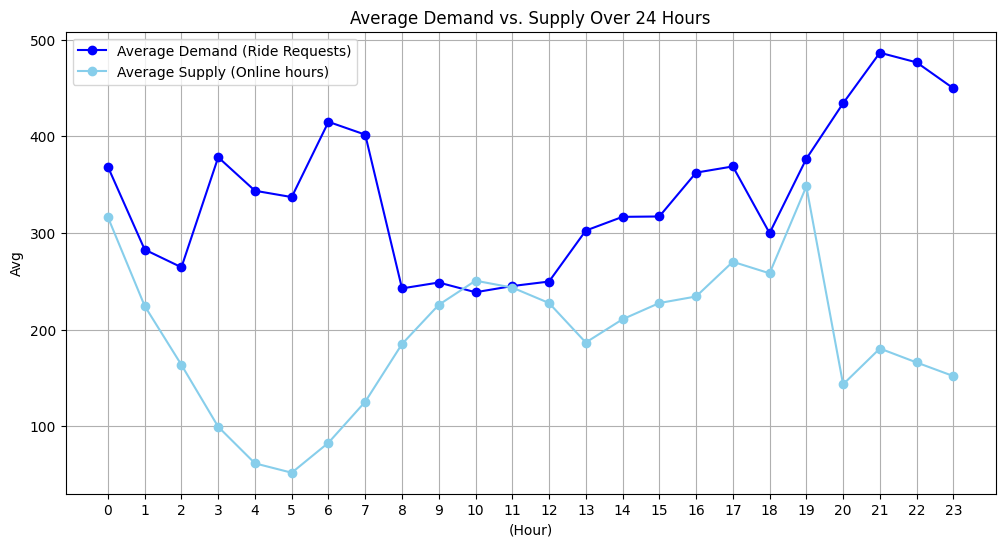

In [29]:
df['hour'] = pd.to_numeric(df['hour'])

hourly_avg = df.groupby('hour').agg(
    avg_rides_requests=('RidesRequests', 'mean'),
    avg_active_drivers=('Active Drivers', 'mean')
).reset_index()

hourly_avg = hourly_avg.sort_values(by='hour')

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['hour'], hourly_avg['avg_rides_requests'], label='Average Demand (Ride Requests)', marker='o', color='blue')
plt.plot(hourly_avg['hour'], hourly_avg['avg_active_drivers'], label='Average Supply (Online hours)', marker='o', color='skyblue')

plt.title('Average Demand vs. Supply Over 24 Hours')
plt.xlabel('(Hour)')
plt.ylabel('Avg')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()



In [30]:
print("\nAVG Table:")
print(hourly_avg)


AVG Table:
    hour  avg_rides_requests  avg_active_drivers
0      0          368.400000          316.228571
1      1          282.728571          224.385714
2      2          264.414286          163.371429
3      3          378.285714           99.314286
4      4          343.642857           61.471429
5      5          337.085714           51.771429
6      6          414.971429           82.828571
7      7          401.700000          125.271429
8      8          242.557143          184.971429
9      9          248.657143          225.542857
10    10          238.585714          250.528571
11    11          245.000000          243.428571
12    12          249.657143          227.414286
13    13          302.414286          186.542857
14    14          316.628571          210.600000
15    15          317.000000          227.414286
16    16          362.376812          234.185714
17    17          368.811594          270.114286
18    18          299.800000          258.171429
19    19

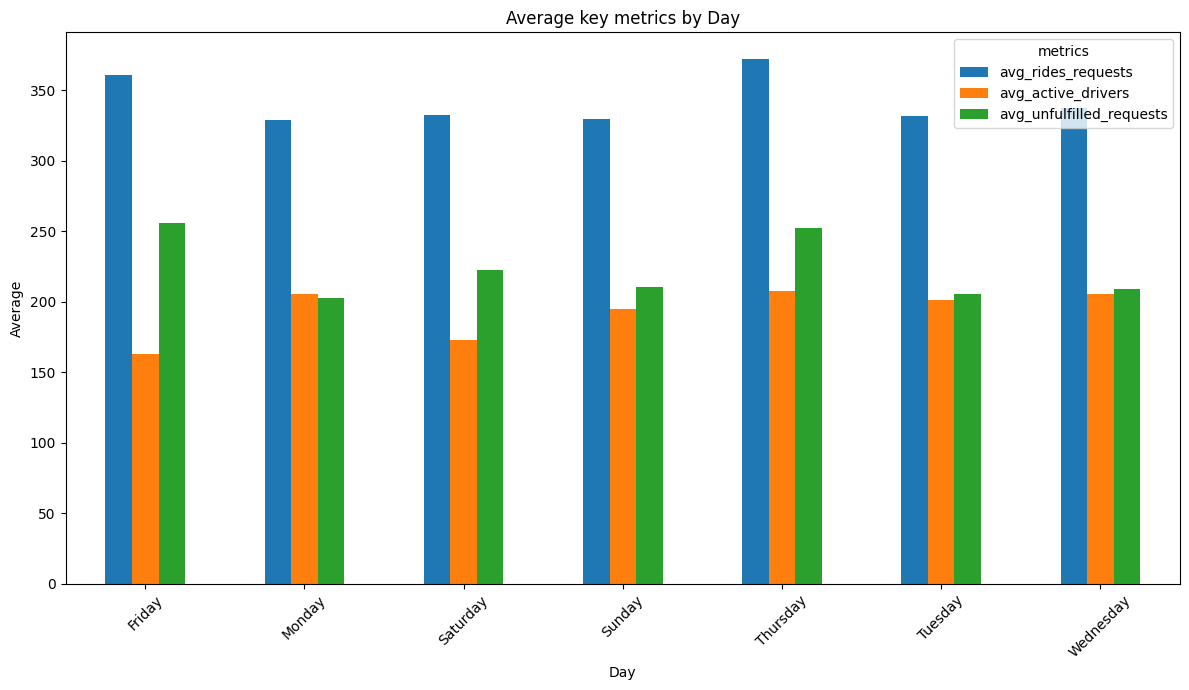

In [31]:
if 'day_name' in df.columns:
    daily_avg_metrics = df.groupby('day_name').agg(
        avg_rides_requests=('RidesRequests', 'mean'),
        avg_active_drivers=('Active Drivers', 'mean'),
        avg_unfulfilled_requests=('Unfulfilled Requests', 'mean')
    )

    if not daily_avg_metrics.empty:
        daily_avg_metrics.plot(kind='bar', figsize=(12, 7), subplots=False)
        plt.title('Average key metrics by Day')
        plt.xlabel('Day')
        plt.ylabel('Average')
        plt.xticks(rotation=45)
        plt.legend(title='metrics')
        plt.tight_layout()
        plt.show()


###q2

In [32]:
morning_peak_condition = (df['hour'] >= 3) & (df['hour'] <= 7)
evening_peak_condition = (df['hour'] >= 19) & (df['hour'] <= 23)

df_morning_peak = df[morning_peak_condition].copy()
df_evening_peak = df[evening_peak_condition].copy()

print(f"Number of records in the morning peak period (3-7): {len(df_morning_peak)}")
print(df_morning_peak[['hour', 'Unfulfilled Requests', 'RidesperOnlineHour']].head())

print(f"\nNumber of records in the Evining peak period (19:00- 23:00): {len(df_evening_peak)}")
print(df_evening_peak[['hour', 'Unfulfilled Requests', 'RidesperOnlineHour']].head())

Number of records in the morning peak period (3-7): 350
   hour  Unfulfilled Requests  RidesperOnlineHour
3     3                  85.0                1.40
4     4                  93.0                3.27
5     5                 115.0                2.66
6     6                 278.0                2.84
7     7                 410.0                2.88

Number of records in the Evining peak period (19:00- 23:00): 350
    hour  Unfulfilled Requests  RidesperOnlineHour
19    19                  93.0                0.84
20    20                 138.0                1.17
21    21                 138.0                1.03
22    22                 123.0                1.13
23    23                 109.0                0.93


In [33]:
def calculate_additional_hours_slot(row):
    unfulfilled_requests = row['Unfulfilled Requests']
    rph = row['RidesperOnlineHour']

    if unfulfilled_requests > 0 and rph > 0:
        return unfulfilled_requests / rph
    else:
        return 0

if not df_morning_peak.empty:
    df_morning_peak['Additional_Hours_Needed_Slot'] = df_morning_peak.apply(calculate_additional_hours_slot, axis=1)
    print("\nSample of morning peak data with calculated additional hours needed per slot:")
    print(df_morning_peak[['hour', 'Unfulfilled Requests', 'RidesperOnlineHour', 'Additional_Hours_Needed_Slot']].head())

if not df_evening_peak.empty:
    df_evening_peak['Additional_Hours_Needed_Slot'] = df_evening_peak.apply(calculate_additional_hours_slot, axis=1)
    print("\nSample of evening peak data with calculated additional hours needed per slot:")
    print(df_evening_peak[['hour', 'Unfulfilled Requests', 'RidesperOnlineHour', 'Additional_Hours_Needed_Slot']].head())



Sample of morning peak data with calculated additional hours needed per slot:
   hour  Unfulfilled Requests  RidesperOnlineHour  \
3     3                  85.0                1.40   
4     4                  93.0                3.27   
5     5                 115.0                2.66   
6     6                 278.0                2.84   
7     7                 410.0                2.88   

   Additional_Hours_Needed_Slot  
3                     60.714286  
4                     28.440367  
5                     43.233083  
6                     97.887324  
7                    142.361111  

Sample of evening peak data with calculated additional hours needed per slot:
    hour  Unfulfilled Requests  RidesperOnlineHour  \
19    19                  93.0                0.84   
20    20                 138.0                1.17   
21    21                 138.0                1.03   
22    22                 123.0                1.13   
23    23                 109.0                0.9

In [34]:
total_additional_hours_morning = 0
if not df_morning_peak.empty and 'Additional_Hours_Needed_Slot' in df_morning_peak.columns:
    total_additional_hours_morning = df_morning_peak['Additional_Hours_Needed_Slot'].sum()

total_additional_hours_evening = 0
if not df_evening_peak.empty and 'Additional_Hours_Needed_Slot' in df_evening_peak.columns:
    total_additional_hours_evening = df_evening_peak['Additional_Hours_Needed_Slot'].sum()

total_additional_hours_combined = total_additional_hours_morning + total_additional_hours_evening

print(f"\n--- Total Additional Hours Required ---")
print(f"Morning period (3-7 AM): {total_additional_hours_morning:.2f} hours")
print(f"Evening period (7-11 PM): {total_additional_hours_evening:.2f} hours")
print(f"Combined total for both periods: {total_additional_hours_combined:.2f} hours")



--- Total Additional Hours Required ---
Morning period (3-7 AM): 30184.12 hours
Evening period (7-11 PM): 60614.07 hours
Combined total for both periods: 90798.19 hours


###q3

In [35]:
baseline_week = 14
df_w14 = df[df['week_of_year'] == baseline_week]

if df_w14.empty:
    print(f"No data found for week {baseline_week}. Please choose another baseline week or ensure the correct data is loaded.")

else:
    print(f"Number of records for week {baseline_week}: {len(df_w14)}")

if not df_w14.empty:
    total_price_checks_w14 = df_w14['TotalPriceChecks'].sum()
    total_online_hours_w14 = df_w14['OnlineHours'].sum()
    total_boarded_rides_w14 = df_w14['RidesBoarded-Detailed'].sum()
    total_rides_requests_w14 = df_w14['RidesRequests'].sum()

    print(f"\n--- Week Report {baseline_week} ---")
    print(f"(TotalPriceChecks): {total_price_checks_w14}")
    print(f"(OnlineHours): {total_online_hours_w14:.2f}")
    print(f"(RidesBoarded-Detailed): {total_boarded_rides_w14}")
    print(f"(RidesRequests): {total_rides_requests_w14}")
else:
    total_price_checks_w14 = 0
    total_online_hours_w14 = 0
    total_boarded_rides_w14 = 0
    total_rides_requests_w14 = 0


Number of records for week 14: 144

--- Week Report 14 ---
(TotalPriceChecks): 62946.0
(OnlineHours): 24342.95
(RidesBoarded-Detailed): 14815
(RidesRequests): 40904.0


In [39]:
price_check_to_request_rate_w14 = 0
if total_price_checks_w14 > 0:
    price_check_to_request_rate_w14 = total_rides_requests_w14 / total_price_checks_w14

rph_w14 = 0
if total_online_hours_w14 > 0:
    rph_w14 = total_boarded_rides_w14 / total_online_hours_w14

print(f"\n--- Week {baseline_week} Rates and Ratios ---")
print(f"Price Check to Request Conversion Rate: {price_check_to_request_rate_w14:.2%}")
print(f"Rides per Online Hour (RPH): {rph_w14:.2f}")



--- Week 14 Rates and Ratios ---
Price Check to Request Conversion Rate: 64.98%
Rides per Online Hour (RPH): 0.61


In [37]:
price_check_to_request_rate_w14 = 0
if total_price_checks_w14 > 0:
    price_check_to_request_rate_w14 = total_rides_requests_w14 / total_price_checks_w14

rph_w14 = 0
if total_online_hours_w14 > 0:
    rph_w14 = total_boarded_rides_w14 / total_online_hours_w14

print(f"\n--- Week {baseline_week} Rates and Ratios ---")
print(f"Price Check to Request Conversion Rate: {price_check_to_request_rate_w14:.2%}")
print(f"Rides per Online Hour (RPH): {rph_w14:.2f}")



--- Week 14 Rates and Ratios ---
Price Check to Request Conversion Rate: 64.98%
Rides per Online Hour (RPH): 0.61


In [38]:
# Expected increases
price_check_increase_pct = 0.50  # 50%
online_hours_increase_pct = 0.15 # 15%

projected_price_checks_w15 = total_price_checks_w14 * (1 + price_check_increase_pct)
projected_online_hours_w15 = total_online_hours_w14 * (1 + online_hours_increase_pct)

print(f"\n--- Week 15 Input Projections ---")
print(f"Projected Price Checks (TotalPriceChecks W15): {projected_price_checks_w15:.0f}")
print(f"Projected Online Hours (OnlineHours W15): {projected_online_hours_w15:.2f}")



--- Week 15 Input Projections ---
Projected Price Checks (TotalPriceChecks W15): 94419
Projected Online Hours (OnlineHours W15): 27994.39
